




# Fake News Challenge
### Stance detection: a first step towards automated fact checking 
----------
`Capstone project by Hannah Penfold`

`1.` [Project Overview](#project_overview)
         
    1.1 Introduction
    1.2 Problem Definition          
    
`2.` [Loading Data](#loading_data)


`3.` [Pre-processing](#pre_processing)

    3.1 Pre-processing
    3.2 Establishing a baseline   
  
`4.` [Vector Space Model](#vector_space)

    4.1 TF-IDF
    4.2 Scoring TF-IDF
    4.3 Dimensionality reduction using SVD 
    
`5.` [Feature Extraction](#feature_extraction)

    5.1 Co-occurance of words in headline and body texts
    5.2 Sentiment analysis
    5.3 Cosine similarity
    5.4 Feature visualisation
    
`6.` [Modelling](#modelling)

    6.1 Preparing the data
    6.2 Stochastic Gradient Descent 
    6.3 Logistic Regression
    6.4 Gradient Boosted Decision Tree 

`7.` [Importing, processing and scoring test data](#test_data)

`8.` [Conclusion and next steps](#conclusion)


<a id='project_overview'></a>
## 1. Project Overview
### 1.1 Introduction
---

The spread of misinformation over the internet is a big problem in today's society, with many people coining this period as the post-truth era. This is thought of as a time where people no longer know whether the information they consume online is the truth or not, therefore they approach all news with some scepticism and pay the closest attention to the news that confirms their views and opinions, rather than that which challenges it. This process is creating a greater polarity between those on the left and the right and many people feel that it has contributed towards bringing more extreme views into the mainstream. 

A Pew Research poll conducted in America showed that 64% of U.S. adults say fabricated news stories cause a great deal of confusion about the basic facts of current issues and events. [(1)](http://www.journalism.org/2016/12/15/many-americans-believe-fake-news-is-sowing-confusion/)
<br/>
<br/>

<img src="http://assets.pewresearch.org/wp-content/uploads/sites/13/2016/12/14150220/PJ_2016.12.15_fake-news_0-01.png" style="margin: 0px 0px 0px 200px; height: 300px">

<br/>
A definition of fake news provided by the New York Times is:
> Narrowly defined, “fake news” means a made-up story with an intention to deceive, often geared toward getting clicks.[(2)](https://www.nytimes.com/2016/12/06/us/fake-news-partisan-republican-democrat.html)

This definition highlights an important element of the fake news problem and helps to explain its complexity; fake news is written with the intent to deceive. This is where the challenge of identifying fake news becomes nuanced and somewhat arbitrary. It is difficult to establish whether facts have been misrepresented by accident or deliberately and for the later, with the abundance of satirical news sites, whether a piece has been written with the intent to entertain or mislead. 

#### Fake news as a machine learning problem
---

There has been a lot of discussion as to whether the issue of fake news is, in fact, a machine learning problem at all. With many ideas and tools, such as Daniel Sieradski's BS Detector [(3)](http://bsdetector.tech) being based purely on the metadata of an article rather the veracity of the claims and statements themselves. One problem with approaches like this is that the models end up being full of bias. To illustrate, many right-wing news outlets are tagged as 'fake-news', however, there's no measure of how much of the news they share is 'fake' and how much just has a strong political bias. People are unlikely to trust tools like this as it can be interpreted as censorship. 

It seems that large technology companies including Google and Facebook have accepted a shared responsibility for combating the spread of misinformation online and have acknowledged how their platforms have enabled fake news to gain traction and make money. Both companies have invested in sophisticated projects that are a great improvement on the biased models seen previously. Such projects seek to automate the fact-checking process, preventing the spread of misinformation through responding to such articles instantaneously and providing people with the facts behind the story. 


### 1.2 Problem Definition
----

This project will be addressing a very specific challenge within the fake news issue; stance detection. It is using the dataset from the first stage of a competition set up by a group of academics and professionals including Dean Pomerleau, called the [Fake News Challenge](http://www.fakenewschallenge.org). 

Stance detection is considered to be one stage of automating the fact-checking process. Fact-checking organisations have large databases of previously checked statements and facts and also continuously source up to date statistics and figures on important social, economic and political factors. A robust Stance Detection Classifier would be able to take a news article and identify which previously checked facts stored within the database are related to it and of those what the relationship is between the article and the checked statements. 

As defined on the FNC website, for the first part of the challenge (FNC-1) they have chosen the task of estimating the stance of a body text from a news article relative to a headline. Specifically, the body text may agree, disagree, discuss or be unrelated to the headline.

The training dataset provided contains 50,000 pairs of headline and body text with the appropriate class label for each. 
<br/>
<br/>
<br/>

|**EXAMPLE HEADLINE**|   |
|:-------- | ----- |
||<br/>  |<br/>    |
|“Robert Plant Ripped up `$`800M Led Zeppelin Reunion Contract”| |
|<br/>  |<br/>    |
|** EXAMPLE SNIPPETS FROM BODY TEXTS ** | **CORRECT CLASSIFICATION** |
|<br/>  |<br/>    |
|“… Led Zeppelin’s Robert Plant turned down £500 MILLION to reform supergroup...”| **Agree**|
|“… No, Robert Plant did not rip up an `$`800 million deal to get Led Zeppelin back together...”| **Disagree**|
|“… Robert Plant reportedly tore up an `$`800 million Led Zeppelin reunion deal...”|**Discusses**|
|“… Richard Branson’s Virgin Galactic is set to launch SpaceShipTwo today..."| **Unrelated** |

<br/>
<br/>

This is an imbalanced multi-class classification problem where I will be using numerous Natural Language Processing libraries and tools, to process and extract features out of the headline and body corpora. My overall aim is to evaluate the relationship between a headline `(H1)` with a corresponding body text `(B1)` as such I will be aiming to create features that extract the semantics of each text in an effective way. Furthermore, I am not interested in the relationship between different headline texts `(H1 -> H2)` or different body texts `(B1 -> B2)` and will, therefore, be treating each observation as independent. With regards to the data provided, this has been labelled by someone else so I will, therefore, need to assume that all labels have been correctly classified. 

Initially, I will be focusing on preprocessing techniques that will clean the text data; removing punctuation and stopwords, changing text to lowercase and lemmatising. After this I will move on to feature extraction and semantics, I will use a Term Frequency-Inverse Document Frequency (TF-IDF) vectorizer to numerically represent the importance of different words within a text. I will also calculate the co-occurrence of words, compare the polarity and finally the cosine similarity of the two texts. 

After generating my features I will use several different machine learning algorithms to model my data and predict the relationship between the texts in my holdout data. 


<a id='loading_data'></a>
## 2. Importing packages and loading data
----

In [1]:
import pandas as pd
import numpy as np 
import pickle
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

import spacy
import re
import nltk, string
from nltk.corpus import stopwords
from textblob import TextBlob, Word

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import hstack, vstack
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.model_selection import learning_curve, StratifiedShuffleSplit, StratifiedKFold, ShuffleSplit

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, accuracy_score, f1_score

nlp = spacy.load("en")
%matplotlib inline
plt.style.use('bmh')
%config InlineBackend.figure_format = 'retina'
sns.set_style("darkgrid")
pd.options.mode.chained_assignment = None

<br/>

The data provided for this challenge is contained in four csv files, for both the test data and the training data there is one csv containing the body text and the other contains the headline and the stance classification. For the training data there is a total of just under 50,000 headline texts with 1,700 body texts. Therefore each body of text has mutliple healines which are associated with it. 

For the test data there are just over 25,000 headline texts with 904 coresponding body texts, so again in the testing data each body text has multiple headlines associated with it. 

<br/>

In [2]:
#importing train stance and body csv files 

stance = pd.read_csv('../../../fnc-1/train_stances.csv', encoding='utf8')
body = pd.read_csv('../../../fnc-1/train_bodies.csv', encoding='utf8')


#merging the two datasets on the Body ID column so I can work from a single dataframe.

train = pd.merge(stance, body, how='left', on='Body ID')
train.head()

,Headline,Body ID,Stance,articleBody
0,Police find mass graves with at least '15 bodi...,712,unrelated,Danny Boyle is directing the untitled film\n\n...
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree,Hundreds of Palestinians were evacuated from t...
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated,30-year-old Moscow resident was hospitalized w...
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated,(Reuters) - A Canadian soldier was shot at the...
4,Spider burrowed through tourist's stomach and ...,1923,disagree,"Fear not arachnophobes, the story of Bunbury's..."


In [3]:
print "Headline text:\n\n", train.iloc[4,0]
print ""
print 'Character length: ', len(train.iloc[4,0])

Headline text:

Spider burrowed through tourist's stomach and up into his chest

Character length:  63


In [4]:
print "Body text (disagrees with headline):\n\n", train.iloc[4,3][:453]

print 'Character length: ', len(train.iloc[4,3])

Body text (disagrees with headline):

Fear not arachnophobes, the story of Bunbury's "spiderman" might not be all it seemed.

Perth scientists have cast doubt over claims that a spider burrowed into a man's body during his first trip to Bali. The story went global on Thursday, generating hundreds of stories online.

Earlier this month, Dylan Thomas headed to the holiday island and sought medical help after experiencing "a really burning sensation like a searing feeling" in his abdomen.

Character length:  3386


<br/>
Looking at the data that I have, I can see that the headline text is a short one sentence statement. Whereas the corresponding body text is several paragraphs long, it is likely that there will be a lot of noise within the body text and only a few important setences which show the facts or claims of the article. 

<br/>

<a id='pre_processing'></a>
## 3. Pre-processing
----

Initially I will begin with pre-processing my text features. I have written a pre-processing class below which will clean the headline and body texts. 

This process will clean the text; changing words to lowercase and removing punctuation, links and abnormal characters. After this I will tokenize the texts using spaCy's package, removing any words that are in NLTK's library of stopwords, as these words are likely to just create noise rather than providing any true meaning. The function will then lematize words to find the root of the word. This will allow the models to recongise words with the same root as the same word, i.e. evacuate, evacuating, evacuated. 

To make it simpler to interact with my data for my analysis I will will also encode the Stance target variable to numbers using the following dictionary:

            stance_dict = {'agree': 1,
                           'disagree': 2, 
                           'discuss': 3,
                           'unrelated': 4}
                      

In [3]:
class PreProcessor(object):
    
    '''Pre-processor which cleans text, lemmatises, removes stop words and punctuation, 
    returns df of processed text.'''
    
    def __init__(self):
        self._stopWordList = [word for word in list(stopwords.words('english') + 
                                                    ["n't", "'s", "'m", "ca"])
                              if word not in ['no', 'not']]
        self._punct_removal = list(string.punctuation) + ["--", "---"] 
        self._word_pattern = r"(?u)\b\w\w+\b"
        self._stance_dict = {'agree': 1,
                           'disagree': 2, 
                           'discuss': 3,
                           'unrelated': 4}
    
    def _clean_text(self, sample):

        ''' Cleans a string: Lowercasing, trimming, removing non-alphanumeric '''
        word_pat = re.compile(self._word_pattern, flags = re.UNICODE | re.LOCALE)

        sample = " ".join(word_pat.findall(sample)).lower()

        return sample

    def _tokenize_text(self, sample):
        
        '''tokenises sentences in order to lemmatise, remove stop words and punctuation, 
        returns string of processed text'''

        #get tokens using spacy   
        tokens = nlp(sample)

        #lemmatising tokens 
        tokens = [t.lemma_.strip() 
                  if t.lemma_ != "-PRON-" 
                  else t.lower_ 
                  for t in tokens]

        #stopword and punctuation removal 
        tokens = [t for t in tokens 
                  if (t not in self._stopWordList and t not in self._punct_removal)]
        
        processed_text = " ".join(tokens)

        return processed_text

    def transform_text(self, df, pickle_df=False):
        
        '''applies the clean and tokenise methods to the headline and body texts, 
        encodes the target variable to numerical. 
        Option to set pickle to True to save clean df'''
        
        cleaned_headline = df['Headline'].apply(lambda row: self._clean_text(row))
        df['headline'] = cleaned_headline.apply(lambda row: self._tokenize_text(row))
        
        cleaned_body = df['articleBody'].apply(lambda row: self._clean_text(row))
        df['body'] = cleaned_body.apply(lambda row: self._tokenize_text(row))
        
        clean_df = df[['headline','body', 'Stance']]
        clean_df['all_text'] = clean_df['headline'] + clean_df['body']
        
        #encoding the different classes to numerical features
        
        clean_df['Stance'] = clean_df['Stance'].apply(lambda row: self._stance_dict[row])
        
        #pickle if true 
        if pickle_df:
            with open('../../../../Documents/general_assembly/clean_df.p', 'wb') as my_file:
                pickle.dump(clean_df, my_file)

        return clean_df

In [4]:
processor = PreProcessor()
clean_train = processor.transform_text(train, pickle_df=True)
clean_train.head()

,headline,body,Stance,all_text
0,police find mass graf least 15 body near mexic...,danny boyle direct untitled film seth rogen ey...,4,police find mass graf least 15 body near mexic...
1,hundred palestinian flee flood gaza israel ope...,hundred palestinian evacuate home sunday morni...,1,hundred palestinian flee flood gaza israel ope...
2,christian bale pass role steve job actor repor...,30 year old moscow resident hospitalize wound ...,4,christian bale pass role steve job actor repor...
3,hbo apple talk 15 month apple tv stream servic...,reuter canadian soldier shoot canadian war mem...,4,hbo apple talk 15 month apple tv stream servic...
4,spider burrow tourist stomach chest,fear not arachnophob story bunbury spiderman m...,2,spider burrow tourist stomach chestfear not ar...


### Establishing the baseline 

-----

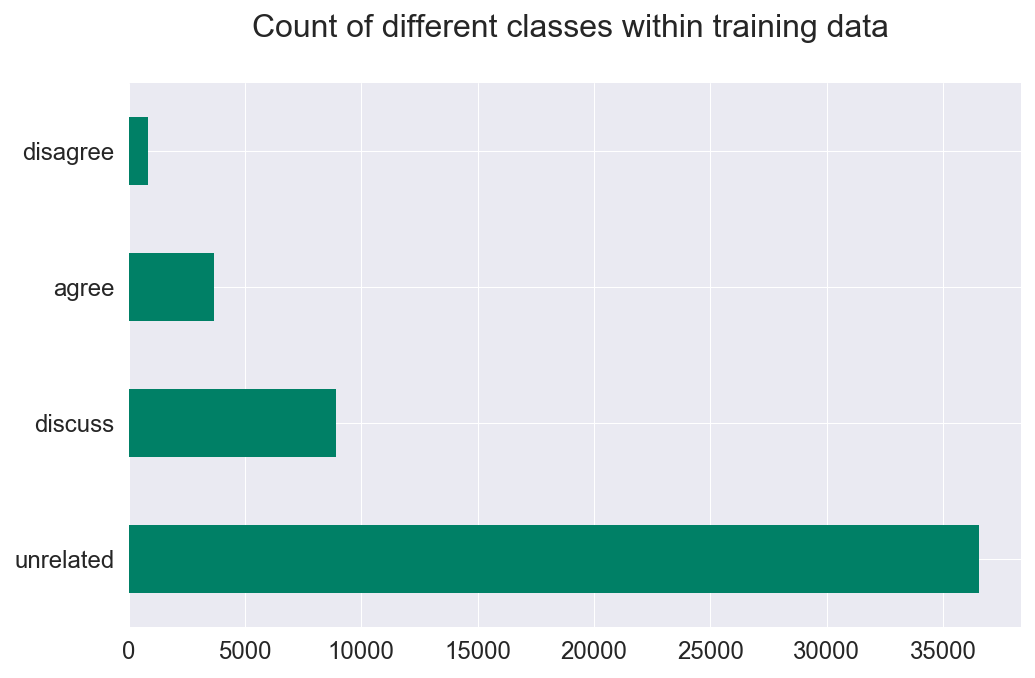

In [8]:
train.Stance.value_counts().plot(kind='barh', figsize=(8,5), fontsize=12, cmap='summer')
plt.title('Count of different classes within training data \n', size=16)
plt.show()

I can see from the above that there is a highly imbalanced class representation within the data. 73% of the data is labelled as 'unrelated', 18% as 'discuss', 7% as 'agree' and finally just under 2% as 'disagree'. 

To address this class imbalance the organisers of the Fake New Challenge have suggested a weighted scoring system. This scoring system is designed to give a higher score where the minority classes are correctly classified. The scoring works as follows:

* `+ 0.25` points for each correct classification the majority class 'unrelated'
* `+ 0.75` points for each correct classification of one of the minority classes 'agree', 'disagree or 'discuss'
* `+ 0.25` points for identifying that the body and headline texts are related (classes 'agree', 'disagree or 'discuss'), but incorrectly labelling the class within those three.

In [5]:
def weighted_score(y_true, y_pred):
    score = 0
    related = [1, 2, 3]

    for i,(t, p) in enumerate(zip(y_true, y_pred)):
        if t == p:
            if t in related:
                score +=0.75
            else:
                score +=0.25
        
        if t != p:  
            if t in related and p in related:
                score += 0.25
              
    return score 

def weighted_accuracy_score(y_true, y_pred):
    
    score = weighted_score(y_true, y_pred)
    max_score = weighted_score(y_true, y_true)
    
    return score/max_score

In [6]:
all_unrelated = np.full(len(clean_train.Stance), 4)

weighted_accuracy_score(clean_train.Stance, all_unrelated)*100

47.56853148673626

The basline for the model would have been **73%**, however due to the wighted scoring system the baseline for the training data becomes **47.5%**. 

<a id='vector_space'></a>
## 4. Vector Space Model  

---

###  4.1 Term Frequency Inverse Document Frequency (TF-IDF)

Term Frequency-Inverse Document Frequency is a really useful Natural Language Processing technique as it computes the "relative frequency" that a word appears in a document compared to its frequency across all documents. It therefore effectively identifies the most important words in each document. 

In the context of this project, this is likely to help to establish whether two texts are related or unrelated. The vectorizer shows the words that are important in a headline `H1` and also the words that are important in the corresponding body text `B1`. If both `H1` and `B1` contained the word `'Obama'` but the word doesn't appear in the rest of the corpus this would provide a high score for the word for both texts and therefore indicate there is a relationship between the two texts. However, it would be difficult to know what this relationship is (agree, disagree or discuss) without an understanding of the words before and after `'Obama'`. 

Term frequency (tf) is the frequency of a certain term in a document:

$$
\mathrm{tf}(t,d) = \frac{N_\text{term}}{N_\text{terms in Document}}
$$

Inverse document frequency (idf) is defined as the frequency of documents that contain that term over the whole corpus (logarithmically scaled and adjusted to give only positive results greater or equal to one).

$$
\mathrm{idf}(t, D) = \log\frac{1+N_\text{Documents}}{1+N_\text{Documents that contain term}}+1
$$

Term frequency - Inverse Document Frequency is calculated as:

$$
\text{tf-idf}(t,d,D) = \mathrm{tf}(t,d) \cdot \mathrm{idf}(t, D)
$$

<br/>
The output of a tf-idf vectoriser is a representation of a set of documents as vectors in a common vector space, this is known as a **vector space model**. 


#### Fitting a TF-IDF Vectorizer 

-----
<br/>
Initially, I will fit a TF-IDF vectorizer on the data using all of the text in both the headline and the body. I will set the `n-gram` hyperparameter to use `n-gram` lengths between 1 and 2, and i'll change the `max_df` to 0.8 which should be an effective way of removing corpus specific stop words. 

I will fit the TF-IDF vectorizer on a feature which contains both the headline and body text. This will generate a vocabulary for the entire corpora which I will then be able to feed in as an argument to both the headline and body vectorizers. This will ensure that the resulting sparse matrices are of the same shape and have the same vocubulary, as I want to be able to compare language and semantics across pairs of headline and body text, this will be a really important feature. 

As I mentioned above, both the headline and body texts have been repeated throughout our corpus matched with a different pair in each instance, therefore when fitting the TF-IDF vectorizer I have ensured it is only fitted on unique instances of the texts. As not all of the texts have been repeated the same number of times, it would affect the TF-IDF scores assigned to n-grams if we were not to do this. I will then use the transform method across the whole dataset.

<br/>

In [7]:
vec = TfidfVectorizer(ngram_range=(1,2))
vec.fit(clean_train.all_text)
vocab = vec.vocabulary_
    
vecH = TfidfVectorizer(ngram_range=(1,2), max_df=0.8, vocabulary=vocab)
vecH.fit(clean_train.headline.unique())
    
vecB = TfidfVectorizer(ngram_range=(1,2), max_df=0.8, vocabulary=vocab)
vecB.fit(clean_train.body.unique())
    
xHTrainTfidf = vecH.transform(clean_train.headline)
print 'Train headline matrix shape: \t', xHTrainTfidf.shape
    
xBTrainTfidf = vecB.transform(clean_train.body)
print 'Train body matrix shape: \t', xBTrainTfidf.shape
  

Train headline matrix shape: 	(49972, 322089)
Train body matrix shape: 	(49972, 322089)


<br/>

Due to the size of the dataset and the fact I used both 1 and 2 n-grams the resulting matrix is really large with over 320,000 features. 

The size of matrix means I will need to keep it as a sparse matrix as it will be too large for my computer memory in a dense format. This can create some difficulties and restrictions in terms of what models I can use therfore I will perform some sort of dimensionality reduction to make the data easier to work with.

The below visulisation shows the sparcity of the resulting matrices, it shows that both matrices are very sparse, especially the headline matrix. Again this points to the the fact that dimensionality reduction would be beneficial.

<br/>

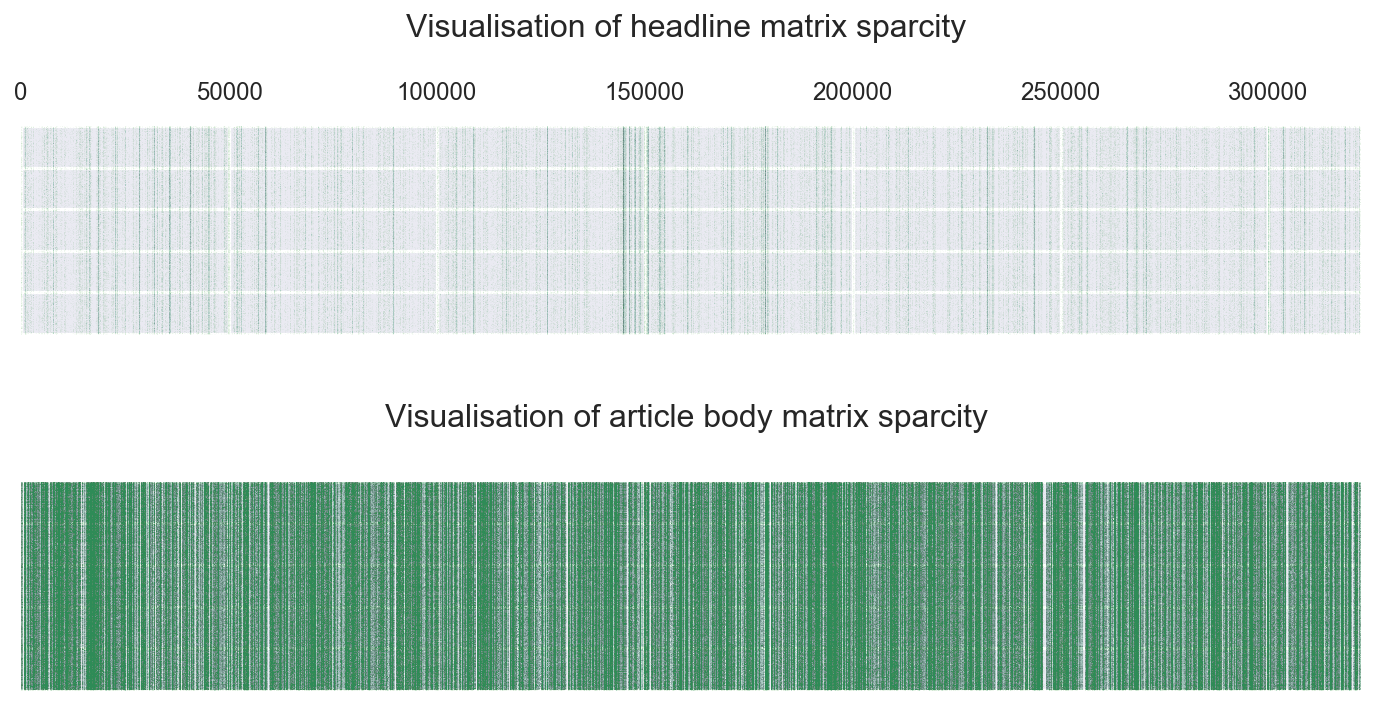

In [8]:
import plotter_help
plotter_help.sparse_matrix_plotter(xHTrainTfidf, xBTrainTfidf, markersize=0.1)

In [18]:
with open('../../../fnc-1/xHTrainTfidf.p', 'wb') as my_file:
    pickle.dump(xHTrainTfidf, my_file)

with open('../../../fnc-1/xBTrainTfidf.p', 'wb') as my_file:
    pickle.dump(xBTrainTfidf, my_file)


<br/>
### 4.2 Scoring the TF-IDF vectorizer
---

**Naive Bayes**

To get a quick idea of where the starting point of my modelling is I will use a Naive Bayes classifier on the sparse headline and body matrices, this will help me to understand what predictive power that word frequency alone has is classifying the stance of a text. 

Naive Bayes classifiers are often used in text classification. The model assumes that each of the features, `f`, it uses are conditionally independent of one another given some class, `c`. The Multinomial Naive Bayes model assumes that each `p(fi|c)` is a multinomial distribution. This works well for data which can easily be turned into counts, such as word counts in text.

<br/>

In [128]:
X = hstack([xHTrainTfidf, xBTrainTfidf])
y = clean_train.Stance

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size = 0.3)

nb = MultinomialNB()
mod = nb.fit(Xtr, ytr)
y_pred = cross_val_predict(mod, Xte, yte, cv=3)

def print_scores(y_test, y_pred):
    print 'Accuracy:\t\t\t', accuracy_score(y_test, y_pred)

    print '\nF1 score:'
    for i in range(1,5):
        print i, '\t\t\t\t', f1_score(y_test, y_pred, labels=[i], average='macro')

    print '\nWeighted accuracy score: \t', weighted_accuracy_score(y_test, y_pred)

print_scores(yte, y_pred)

Accuracy:			0.7299226254

F1 score:
1 				0.0
2 				0.0
3 				0.0
4 				0.843878928089

Weighted accuracy score: 	0.473928107406


The Naive Bayes model above is very close to just predicting the baseline for every observation. Therefore, I am going to try a few different models to see if I can get any better results. 

** Stochastic Gradient Descent ** 

- less computationally expensive 
- can handle sparce matrices

In [129]:
sgd = SGDClassifier(random_state=1106)
mod = sgd.fit(Xtr, ytr)

y_pred = cross_val_predict(mod, Xte, yte, cv=5)

print_scores(yte, y_pred)

Accuracy:			0.794490394877

F1 score:
1 				0.330944625407
2 				0.235649546828
3 				0.516067146283
4 				0.880407549691

Weighted accuracy score: 	0.643828497185


The preformance of stochastic gradient descent is better than naive bayes. It is better at identifying the minority classes within the dataset. It is still predicting the majority class (unrelated) alot more that the other classes. 

In [130]:
lr = LogisticRegression(random_state=1106)
mod = lr.fit(Xtr, ytr)

y_pred = cross_val_predict(mod, Xte, yte, cv=5)

print_scores(yte, y_pred)

Accuracy:			0.776614194237

F1 score:
1 				0.144578313253
2 				0.10071942446
3 				0.452026680349
4 				0.867809306681

Weighted accuracy score: 	0.593980077956


Logistic regression performs better than Naive Bayes, however not as well as Stochastic Gradient Descent. 

### 4.3 Dimensionality Reduction Using Truncated Singular Value Decomposition

---

<br\>
The trucated Singular Value Decomposition (SVD) transformer performs linear dimensionality reduction. 

Using a SVD on a term by document matrix of term frequency is a form of Latent Semantic Analysis. The dimension of the transformed space is reduced by selection of the highest singular values, where the most variance of the original space is. By using SVD the major associative patterns are extracted from the document space and the small patterns are ignored. 

I have stacked my headline and body matrices vertically and fit the truncated SVD on both corpora reducing the dimensionality to 300 components. 

<br\>

In [13]:
xHBTfidf = vstack([xHTrainTfidf, xBTrainTfidf])
svd_300 = TruncatedSVD(n_components=300, random_state=1106)

xHBSvd300 = svd_300.fit(xHBTfidf)

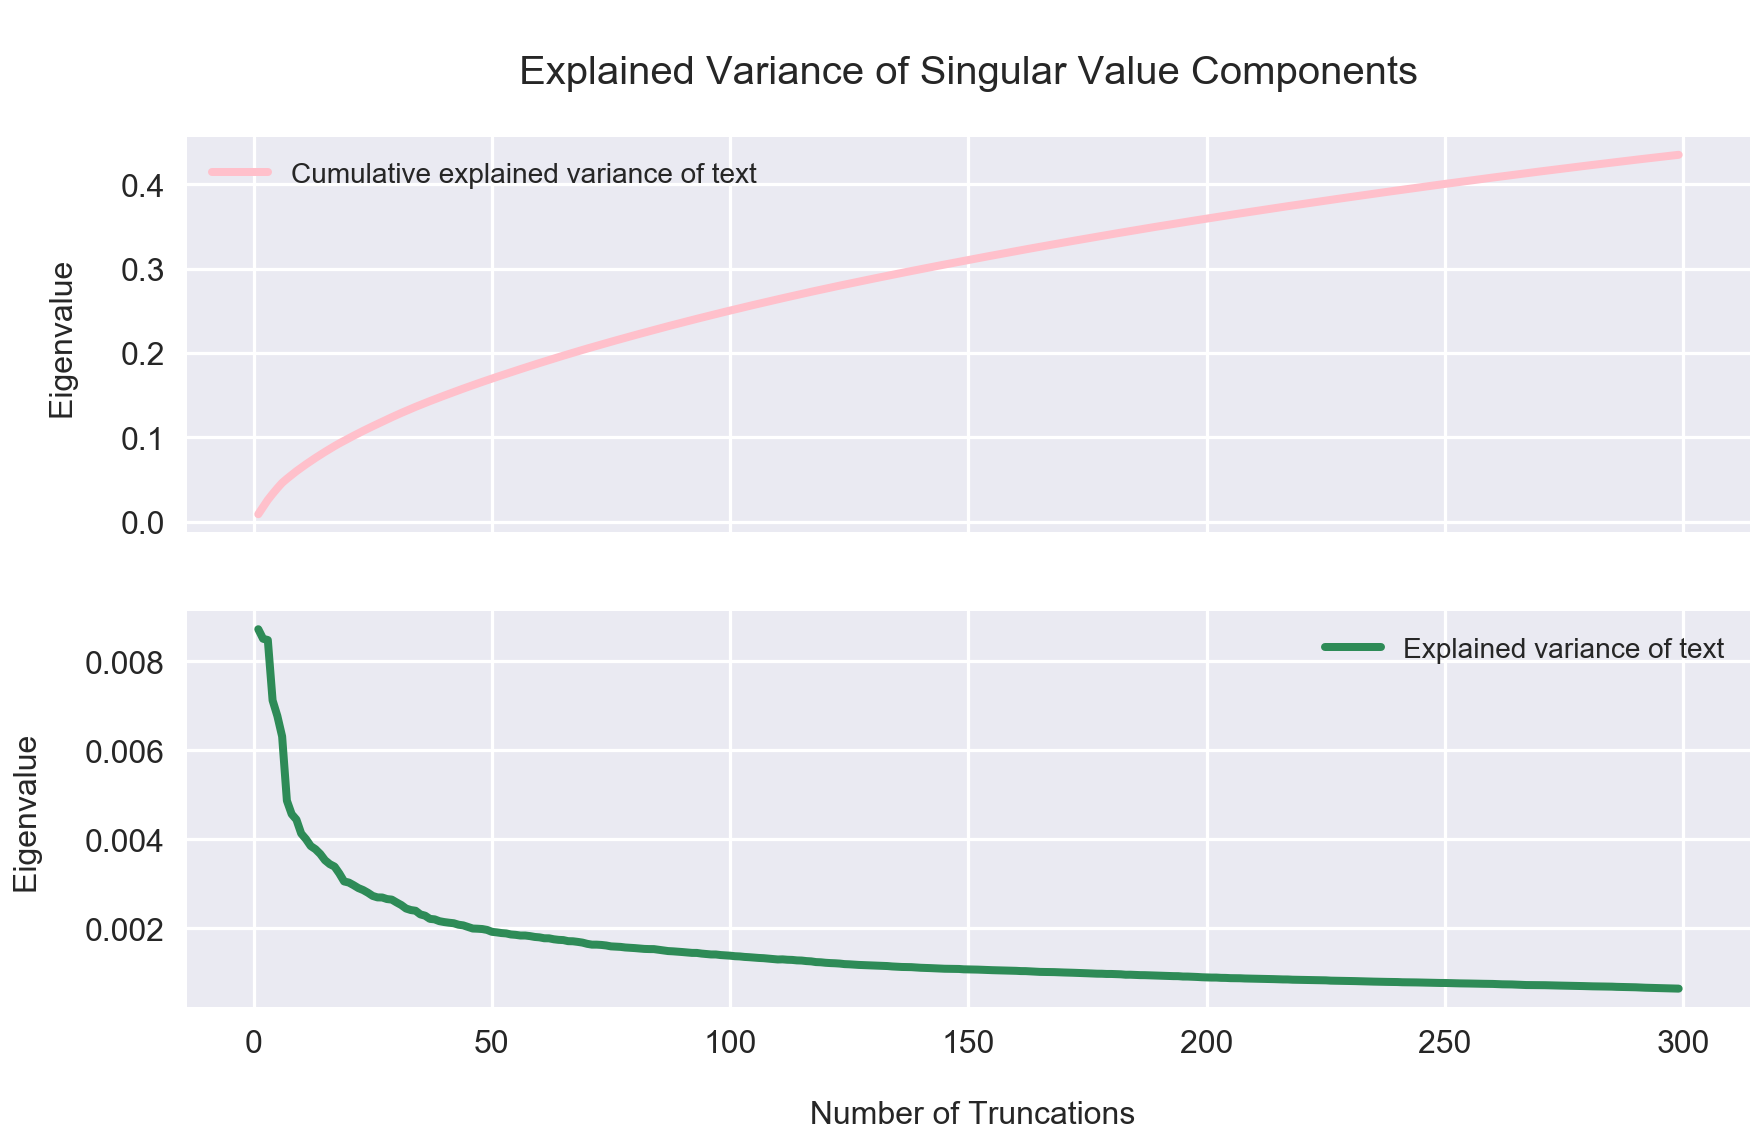

In [15]:
plotter_help.plot_explained_variance(xHBSvd300, 300)

<br\>

We can see from the graph above that taking 300 components explains around 42% of the variance in features. In the lower graph there is a clear elbow to the graph at around 50 components where the explained variance levels off, however at this number of components only around 16% of the variance is explained.

When modelling on the Singular Value Components I found that increasing the number of components improved my model accuracy, however, this came at a significant computational cost. My combined sparse document matrix that is being transformed is (99944 x 712940) which is too large for my computer's memory. I managed to run Singular Value Decomposition with 500 components successfully, however, I couldn't increase the component number greater than this. Additionally, at this level, it took a long time to train models, therefore, I decided to only use a 300 component model.      

Having fit the SVD on both the headline and body matrices, I will then transform them separately. This will enable me to compare the output of the headline with the corresponding body text. 

<br\>

In [16]:
# transforming the headline and body tfidf matrices
xHeadSvdTr300 = svd_300.transform(xHTrainTfidf)
xBodySvdTr300 = svd_300.transform(xBTrainTfidf)

** Examining the SVD components **

---

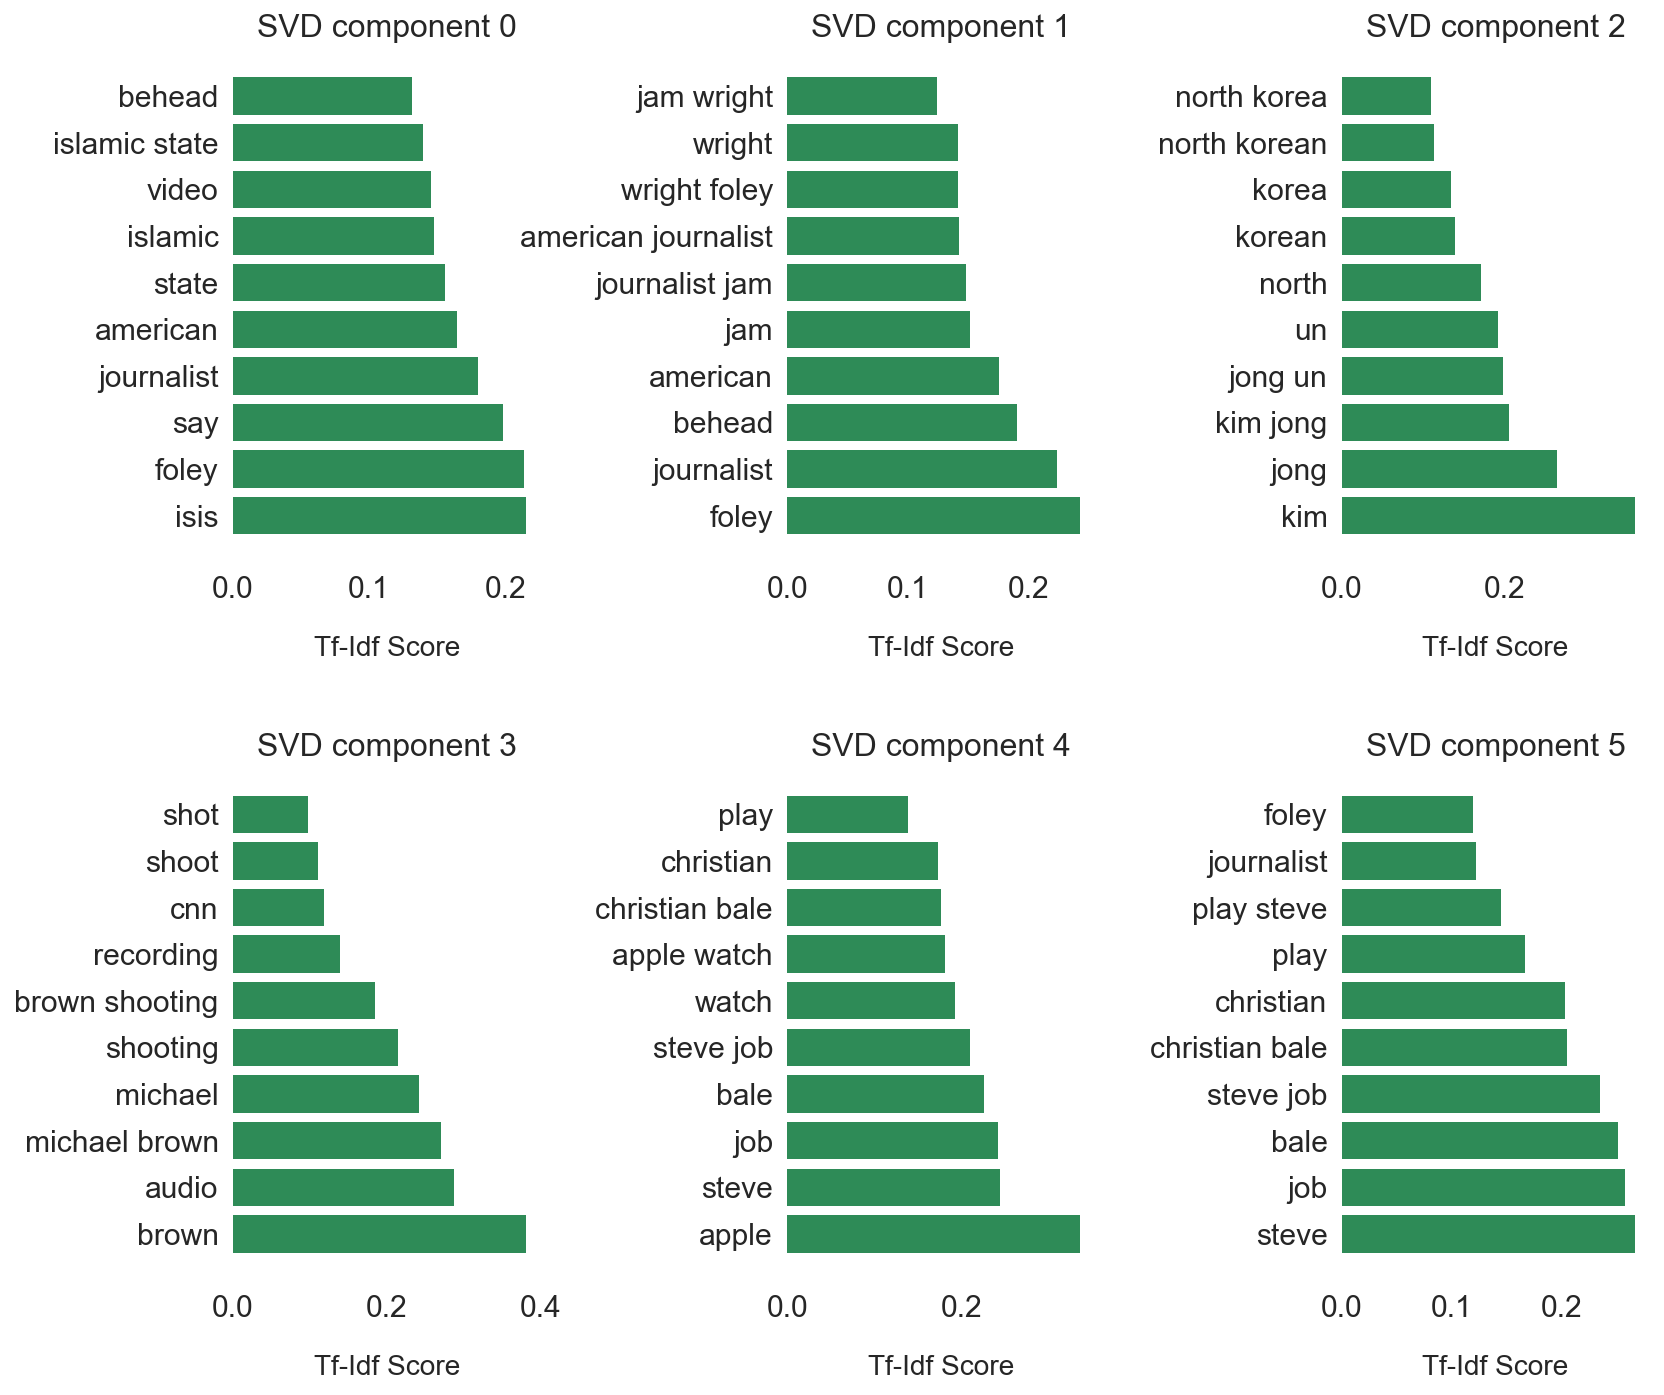

In [172]:
features = vecB.get_feature_names()

dfs = []
for num in range(6):
    indices = np.argsort(svd_300.components_[num])[::-1][:10]
    important_features = [(features[i], svd_300.components_[num][i]) for i in indices]
    dfs.append(pd.DataFrame(important_features, columns =['features', 'tfidf']))


fig = plt.figure(figsize=(12, 9), facecolor="w")
x = np.arange(len(dfs[0]))
for i, df in enumerate(dfs):
    ax = fig.add_subplot(2, (len(dfs)/2), i+1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_frame_on(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlabel("Tf-Idf Score", labelpad=16, fontsize=14)
    ax.set_title("SVD component {}".format(i), fontsize=16)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    ax.barh(x, df.tfidf, align='center', color='seagreen')
    ax.set_yticks(x)
    ax.set_ylim([-1, x[-1]+1])
    yticks = ax.set_yticklabels(df.features)
    plt.subplots_adjust(bottom=0, right=0.97, left=0.15, top=0.95, wspace=0.8, hspace=0.4)
plt.show()

<br/>

We can see from the above plots that the SVD transformation has been able to successfully pick out some clear topics from the articles in our corpus. In fact, it has highlighted some of the biggest stories and topics to feature in the news in 2014.

Component 0 and 1 are focusing on Islamic State and the beheading of American journalist James Foley. Component 2 focuses on North Korea and it's leader Kim Jong Un. Component 3 on the shooting of the black teenager Michael Brown in America. Components 4 and 5 focus on Apple and various stories in relation to it such as Christian Bale dropping out of playing Steve Jobs in a biopic about his life and the release of the Apple watch. 

<br/>

### 4.4 Scoring the SVD components 

---

In [84]:
X = np.hstack((xHeadSvdTr300, xBodySvdTr300))
y = clean_train.Stance

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size = 0.3, random_state=1106)

sgd = SGDClassifier(random_state=1106)
mod = sgd.fit(Xtr, ytr)

y_pred = cross_val_predict(mod, Xte, yte, cv=5)

print_scores(yte, y_pred)

Accuracy:			0.749599786553

F1 score:
1 				0.0123348017621
2 				0.015625
3 				0.26714801444
4 				0.853615101508

Weighted accuracy score: 	0.529011274935


<br/>

We can see from the above results that taking 300 of the SVD components is giving a significantly reduced model performance compared to using the whole TF-IDF matrix. 

The greatest difference can be seen in the F1 score for class 1 (agree) where the score has dropped from 0.33 to 0.01. This is likely to be due to the fact that the model is now only able to recognise patterns in the topics rather than the language itself. Therefore it will be important to create some features that will pick out the patterns in the language, such as counting the co-occurrence of words in the headline and body texts and identifying where refuting words are used. 

<br/>

In [14]:
with open('../../../fnc-1/xHeadSvdTr500.p', 'rb') as my_file:
    xHeadSvdTr500 = pickle.load(my_file)

with open('../../../fnc-1/xBodySvdTr500.p', 'rb') as my_file:
    xBodySvdTr500 = pickle.load(my_file)

with open('../../../fnc-1/xHeadSvdTe500.p', 'rb') as my_file:
    xHeadSvdTe500 = pickle.load(my_file)

with open('../../../fnc-1/xBodySvdTe500.p', 'rb') as my_file:
    xBodySvdTe500 = pickle.load(my_file)

<a id='feature_extraction'></a>
## 5. Feature Extraction 
---

** 5.1.  Co-occurence of words in Body & Headline **

A simple function which counts how many times a word from the headline appears in the body text. This should just be words which are important to the meaning of the headline as stop words were removed in the pre-processing steps. 

A second function will count how many times a word in the headline appears in the 25 most important words in the body text. 

** 5.2.  Sentiment Analysis **

The goal of sentiment analysis is to identify subjective information from texts. In order to do this, I will be using a frequently used form of sentiment analysis referred to as polarity detection. The goal here is to identify whether a given body of text is positive, negative or neutral. I will also be looking at the subjectivity of the headline and body texts. 

** 5.3.  Cosine similarity between Body & Headline **

The cosine similarity is a well-known similarity measure which measures the cosine angle between the two document vectors in the vector space model. It is often used in information retrieval to find documents which are most closely related to a search query. 

I am going to measure the cosine similarity between the headline and body texts in both the TF-IDF vector space model and the SVD transformed model. 

<br/>
<br/>

<img src="http://blog.christianperone.com/wp-content/uploads/2013/09/cosinesimilarityfq1.png" style="float: centre; height: 220px">

<br/>
<br/>

** 5.4. Refuting words **

Counts how many times a refuting word is in the headline and how many times a refuting word is in the first 15 words of a body text. 

<br/>

The below function extracts the 25 words with the highest TF-IDF score from each of the body texts. This will be a useful feature in order to compare the headline and body texts. 

In [86]:
#get the most important terms in the body text 
vecB2 = TfidfVectorizer()
TfidfBody = vecB2.fit_transform(clean_train.body)
features = vecB2.get_feature_names()

def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [features[i] for i in topn_ids]
    return top_feats

def top_feats_in_doc(xTfidf, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(xTfidf[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

top_features = []
for i in range(TfidfBody.shape[0]):
    top_features.append(top_feats_in_doc(TfidfBody, features, i))

clean_train['top_features'] = top_features
clean_train.drop('all_text', axis=1, inplace=True)

In [88]:
class GenerateFeatures(object):
    '''generates features from the headline and body texts'''
    
    def __init__(self):
        
        self._refuting_words = [
            'fake',
            'fraud',
            'hoax',
            'false',
            'deny', 'denies',
            'not',
            'none',
            'despite',
            'nope',
            'doubt', 'doubts',
            'bogus',
            'debunk',
            'pranks',
            'retract'
        ]
    
    def _detect_polarity(self, text):        
        """ calculates the polarity of a body of text""" 
        
        return TextBlob(text).sentiment.polarity
    
    def _detect_subjectivity(self, text):        
        """ calculates the subjectivity of a body of text """
        
        return TextBlob(text).sentiment.subjectivity
    
    def _refuting_count(self, text):       
        """ calculates the number of times a refuting word is in a text """
        
        word_count = 0
        for token in text.split(" ")[:15]:
            if token in self._refuting_words:
                word_count += 1
        return word_count
    
    def _bin_co_occ(self, headline, body):        
        """ Counts how many times a token in the title
        appears in the body text """

        bin_count = 0
        for headline_token in headline.split(" "):
            if headline_token in body.split(" "):
                bin_count += 1
        return bin_count 
    
    def _bin_co_occ_top_words(self, headline, top_features):
        """ Counts how many times a token in the title
        appears in the most important 25 words of the body text """
        
        bin_count = 0
        for headline_token in headline.split(" "):
            if headline_token in top_features:
                bin_count += 1
        return bin_count 

    def generate_features(self, df, headlineSVD, bodySVD, headlineTfidf, bodyTfidf):        
        """ Generates features out of all of the methods 
        returns features as new columns in df. 
        
        Features include:
        - SVD cosine similarity
        - tfidf cosine similarity
        - healdine ppolarity
        - body polarity
        - headline subjectivity
        - body subjectivity
        - binary co-occurance of words
        - binary co-occurance of words in top features
        - refuting words in headline
        - refuting words in body """
        
        #svd cosine similarity 
        df['svd_cosine_sim'] = [cosine_similarity(headlineSVD[i].reshape(1,-1), 
                                        bodySVD[i].reshape(1,-1))[0][0] 
                      for i in range(len(headlineSVD))]
        
        #tfidf cosine similarity
        df['tfidf_cosine_sim'] = [cosine_similarity(headlineTfidf[i], bodyTfidf[i])[0][0] 
                                  for i in range(headlineTfidf.shape[0])]
        
        
        #polarity & subjectivity features
        
        df['headline_polarity'] = df.headline.apply(self._detect_polarity)
        df['body_polarity'] = df.top_features.apply(lambda row: self._detect_polarity(" ".join(row)))
        
        df['headline_subjectivity'] = df.headline.apply(self._detect_subjectivity)
        df['body_subjectivity'] = df.top_features.apply(lambda row: self._detect_subjectivity(" ".join(row)))
        
        #word occurance 
        
        df['bin_co_occ'] = df.apply(lambda x: self._bin_co_occ(x['headline'], x['body']), axis=1)
        df['bin_co_occ_top_words'] = df.apply(lambda x: self._bin_co_occ_top_words(x['headline'], x['top_features']), axis=1)
    
        df['refuting_word_head'] = df.headline.apply(lambda x: self._refuting_count(x))
        df['refuting_word_body'] = df.body.apply(lambda x: self._refuting_count(x))

        return df
        

In [90]:
gf = GenerateFeatures()
clean_train = gf.generate_features(clean_train, xHeadSvdTr300, xBodySvdTr300, xHTrainTfidf, xBTrainTfidf)

with open ('../../../fnc-1/features_df.p', 'wb') as my_file:
    pickle.dump(clean_train, my_file)

In [209]:
clean_train.head(2)

,headline,body,Stance,top_features,svd_cosine_sim,tfidf_cosine_sim,headline_polarity,body_polarity,headline_subjectivity,body_subjectivity,bin_co_occ,bin_co_occ_top_words,refuting_word_head,refuting_word_body
0,police find mass graf least 15 body near mexic...,danny boyle direct untitled film seth rogen ey...,4,"[job, boyle, actress, untitled, wozniak, rogen...",0.003761,0.000000,-0.1,0.1,0.4,0.65,0,0,0,0
1,hundred palestinian flee flood gaza israel ope...,hundred palestinian evacuate home sunday morni...,1,"[gaza, dam, valley, israeli, israel, evacuate,...",0.950361,0.308735,0.0,0.0,0.5,0.50,7,6,0,0


<br/>
#### 5.4 Visualisation of features 

----

Now that I have extracted numerical features from the text data I can do a bit of EDA to examine the features and understand the trends and relationships a little better. 

<br/>

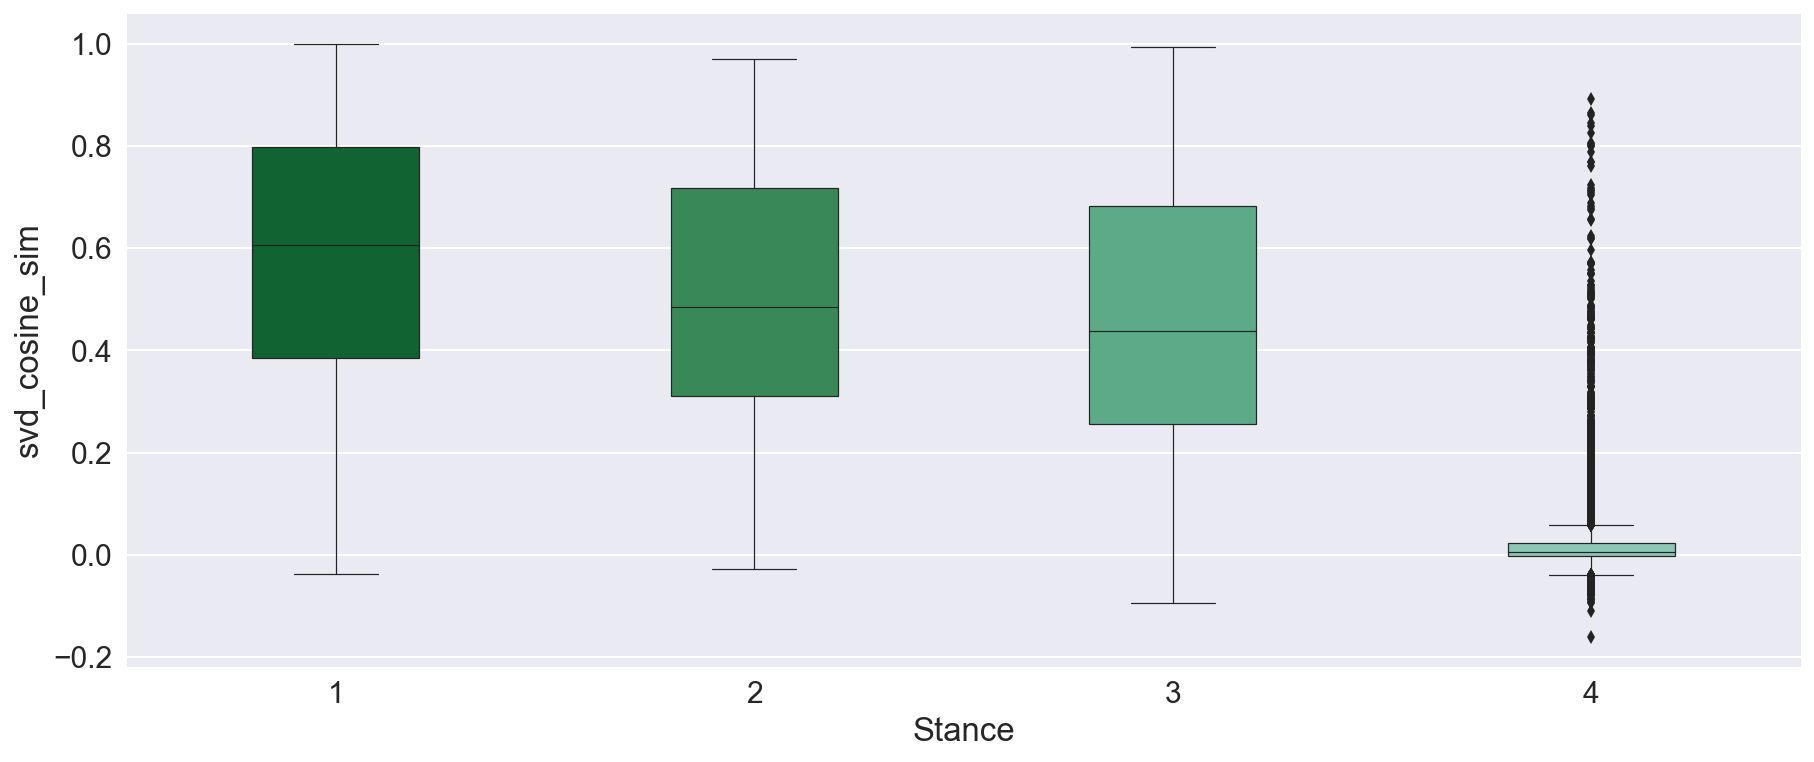

In [187]:
f, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(clean_train.Stance, clean_train.svd_cosine_sim, linewidth=0.6, width=0.4, palette = sns.color_palette("BuGn_r"))
plt.show()

<br/>
We can see that calculating the cosine similarity between the headline and corresponding body text is a really good indicator of whether the texts are related or not, with the majority of the data in class 4 recieving a similarity score close to 0. There is also a small amount of differentiation between the related stances. 

<br/>

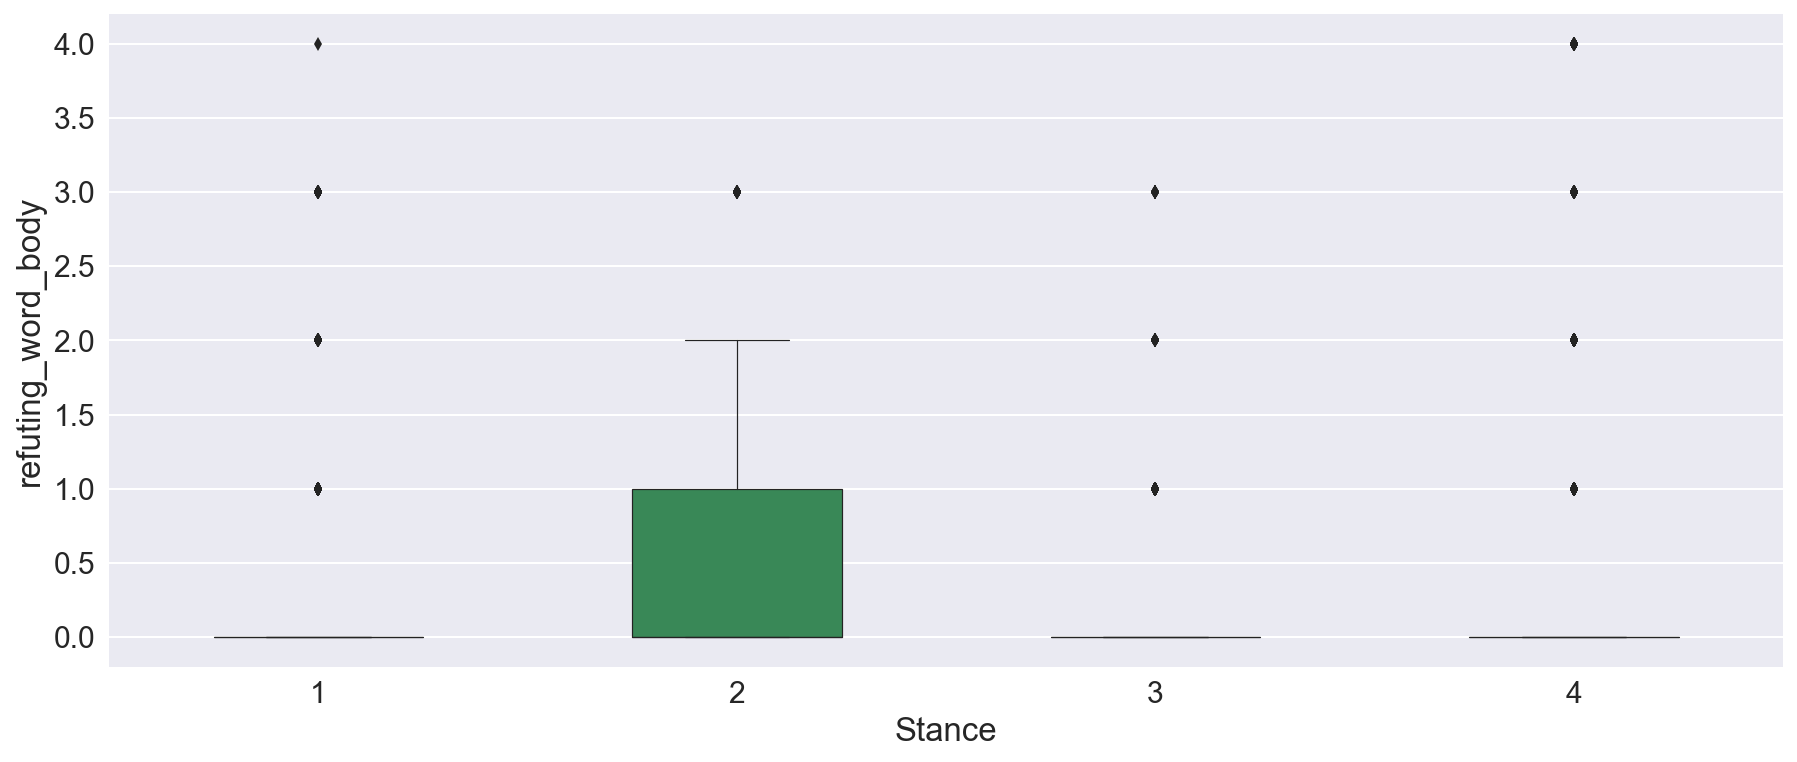

In [191]:
f, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(clean_train.Stance, clean_train.refuting_word_body, linewidth=0.6, width=0.5, palette = sns.color_palette("BuGn_r"))
plt.show()

Calculating the number of times there is a refuting word in the body text is a good indicator of whether the texts are disagreing with each other. 

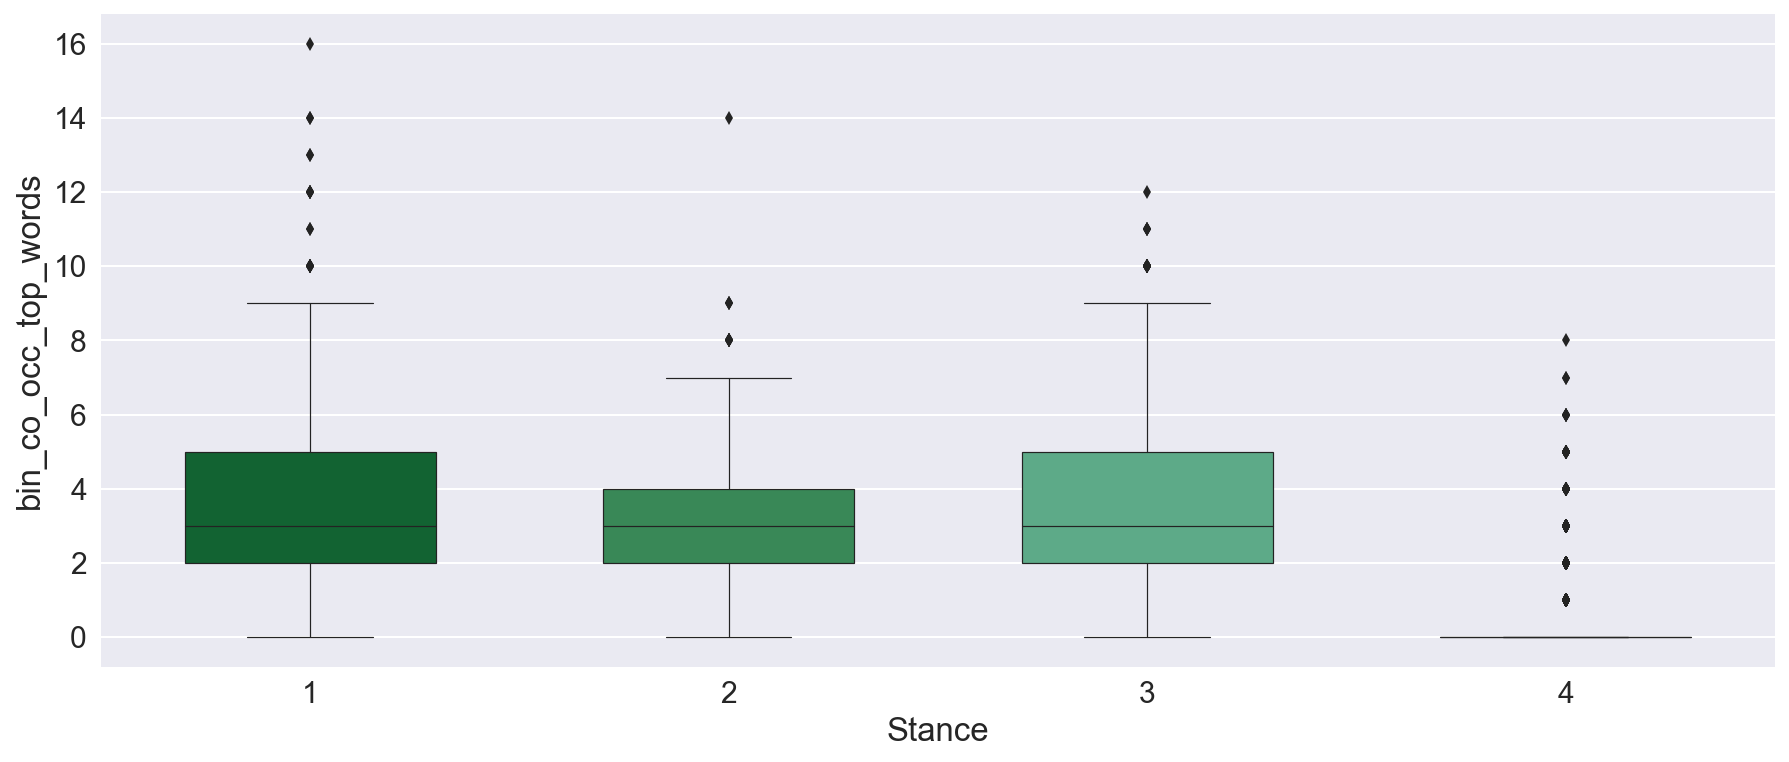

In [195]:
f, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(clean_train.Stance, clean_train.bin_co_occ_top_words, linewidth=0.6, width=0.6, palette = sns.color_palette("BuGn_r"))
plt.show()

<br/>
Again the binary co-occurance fuction has created some clear differention between the three classes that are related and the unrelated class. We can see that most of unrelated class have less that 5 repeated words from the headling in the body text. However there isn't much differentiation in the distributions of the three related classes.

<br/>

<a id='modelling'></a>
## 6. Modelling

---

#### 6.1 Preparing the data 

Rather that converting my SVD matrices into dataframes I am going to change the other features into arrays and stack them for modelling.

I will be using Stratified K-fold to split the data in to train and test sets, it preserves the proportion of each class in each split. This is important in a classification problem like this where there is a significant class imbalance. 

In [203]:
#preparing data, creating train test split 

headline_polarity = np.asarray(clean_train.headline_polarity).reshape(-1,1)
body_polarity = np.asarray(clean_train.body_polarity).reshape(-1,1)
bin_co_occ = np.asarray(clean_train.bin_co_occ).reshape(-1,1)
bin_co_occ_top_words = np.asarray(clean_train.bin_co_occ_top_words).reshape(-1,1)
body_subjectivity = np.asarray(clean_train.body_subjectivity).reshape(-1,1)
headline_subjectivity = np.asarray(clean_train.headline_subjectivity).reshape(-1,1)
tfidf_cosine_sim = np.asarray(clean_train.tfidf_cosine_sim).reshape(-1,1)
svd_cosine_sim = np.asarray(clean_train.svd_cosine_sim).reshape(-1,1)
refuting_word_head = np.asarray(clean_train.refuting_word_head).reshape(-1,1)
refuting_word_body = np.asarray(clean_train.refuting_word_body).reshape(-1,1)

X = np.hstack((xHeadSvdTr300, xBodySvdTr300, bin_co_occ, bin_co_occ_top_words, body_polarity, 
               body_subjectivity, headline_polarity, headline_subjectivity, tfidf_cosine_sim, 
               svd_cosine_sim, refuting_word_head, refuting_word_body))

y = clean_train.Stance

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1106)

for train_index, test_index in sss.split(X,y):
    Xtr, Xte = X[train_index], X[test_index]
    ytr, yte = y[train_index], y[test_index]

kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=1106)

#### 6.2 Stochastic Gradient Descent 

---

In [93]:
sgd = SGDClassifier(random_state=1106)
mod = sgd.fit(Xtr, ytr)

y_pred = cross_val_predict(mod, Xte, yte, cv=kfold)

print_scores(yte, y_pred)

Accuracy:			0.862831415708

F1 score:
1 				0.426623022368
2 				0.0666666666667
3 				0.624960102139
4 				0.976556184317

Weighted accuracy score: 	0.806858853387


<br/>

We can see that the features that were generated have significantly improved the weighted accuracy of our model. The score for class 4 (stance - unrelated), is very close to 1 meaning that the model is able to classify something as related or unrelated very successfully. 

For the three categories for which the headline and body pairs are related, the model still struggles to correctly classify the observation. Especially for the stance disagree, this class was very underrepresented within the data so a future extension to this piece of work could be to over sample the disagree class within the data to help the model to learn.
<br/>

#### 6.3 Logistic Regression
---


In [94]:
lr = LogisticRegression(C=3.79, penalty='l1')
lr_mod = lr.fit(Xtr, ytr)

y_pred = cross_val_predict(lr_mod, Xte, yte, cv=kfold)

print_scores(yte, y_pred)

Accuracy:			0.926463231616

F1 score:
1 				0.626596543952
2 				0.313559322034
3 				0.832927159491
4 				0.986829599457

Weighted accuracy score: 	0.897052124683


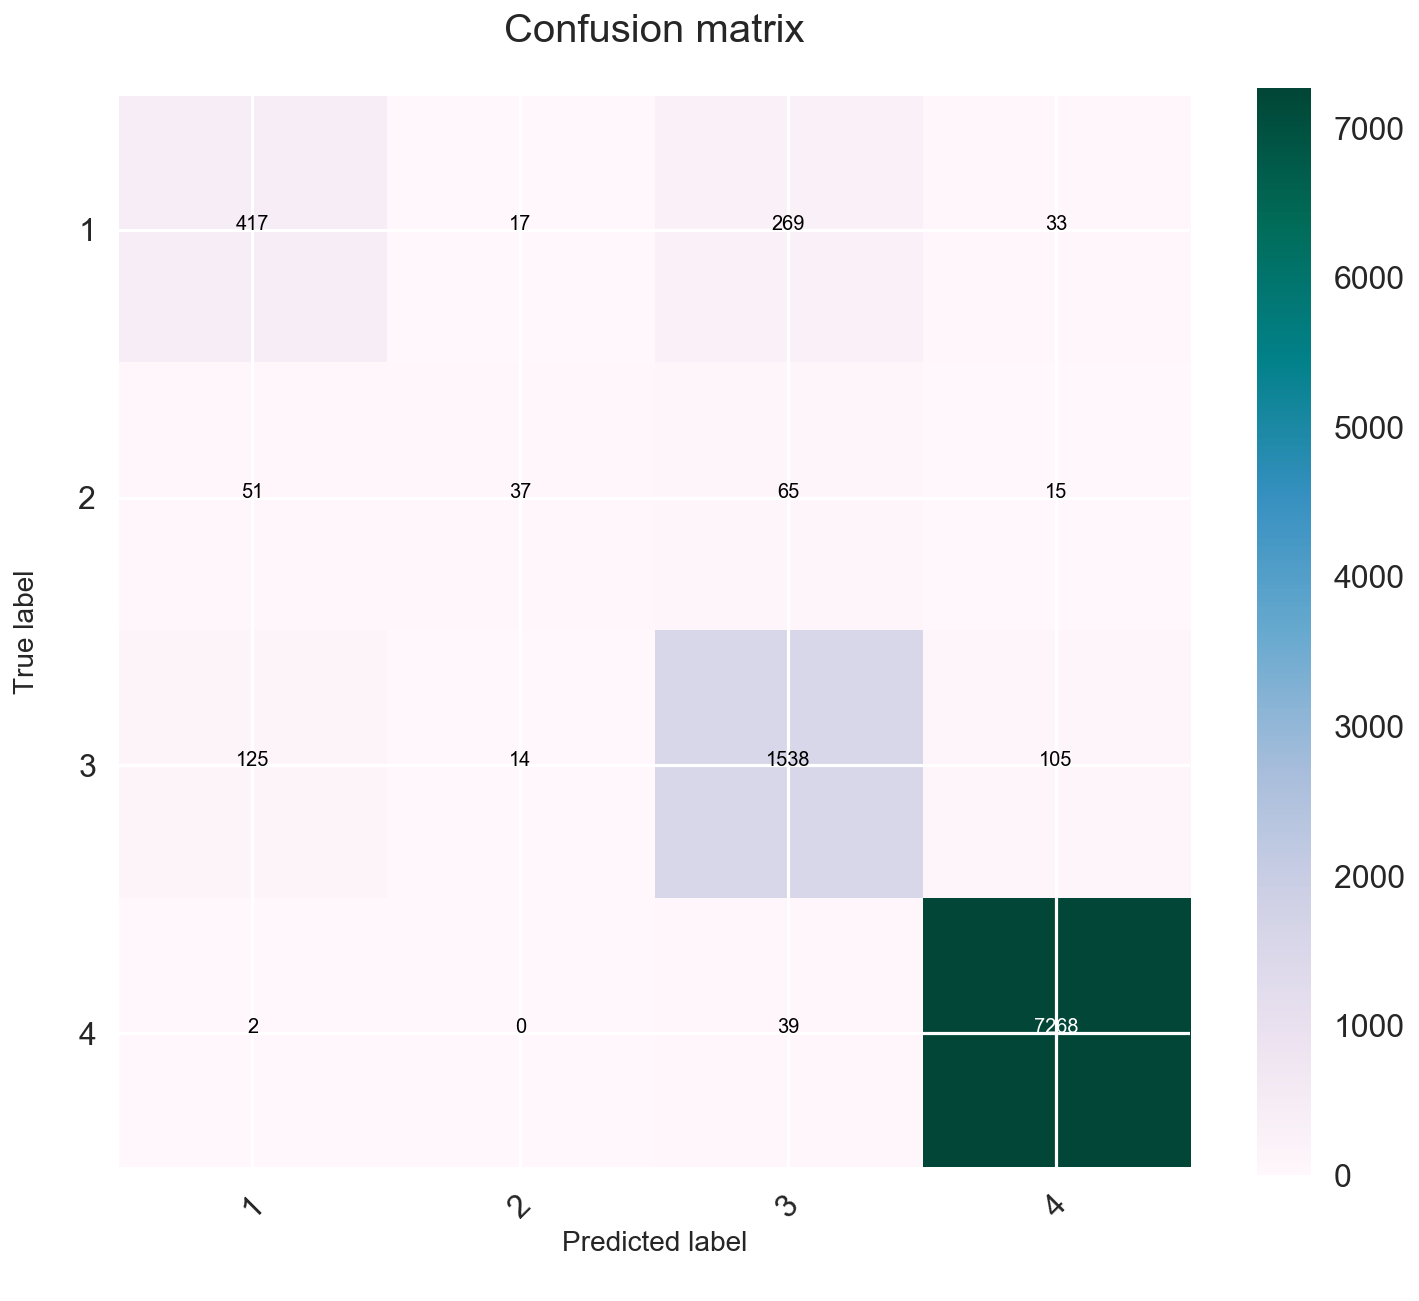

In [96]:
sns.set_style("darkgrid")
cmat = confusion_matrix(yte, y_pred)
plotter_help.plot_confusion_matrix(cmat, mod.classes_)

#### 6.4 Gradient Boosting Decision Tree 
---

Gradient boosting decsion trees are an ensemble technique where each tree learns the error's of the preceeding model. Gradient boosting trees have some nice benefits such as they recognise non-linear relationships, they work well with hetrogeneous data (using different scales) and also they're not a complete black box so you can look at the importance of features within the model.

The gradient boosting classifier is fairly computationally expensive and takes a long time to train, however it is very quick when it comes to predicting. Due to this I have not been able to perform a gridsearch on the model's hyperparameters on my computer. Saying this gradient boosting models do need fine-tuning for optimal performance so this is something I will look to run with Spark using the below parameter grid:

<br/>

                            param_grid = {'learning_rate': [0.1, 0.05, 0.02],
                                         'max_depth' : [4,6],
                                         'min_samples_leaf': [3,5,9],
                                         'max_features': [1.0, 0.8, 0.6]}



<br/>

In [220]:
gbc = GradientBoostingClassifier(n_estimators=1500, learning_rate=0.08, max_depth=6, min_samples_leaf=3, subsample=0.8)
gbc_mod = gbc.fit(Xtr, ytr)

In [205]:
y_pred = gbc_mod.predict(Xte)

print_scores(yte, y_pred)

Accuracy:			0.980690345173

F1 score:
1 				0.907073509015
2 				0.783439490446
3 				0.962880886427
4 				0.996580962801

Weighted accuracy score: 	0.974490791957


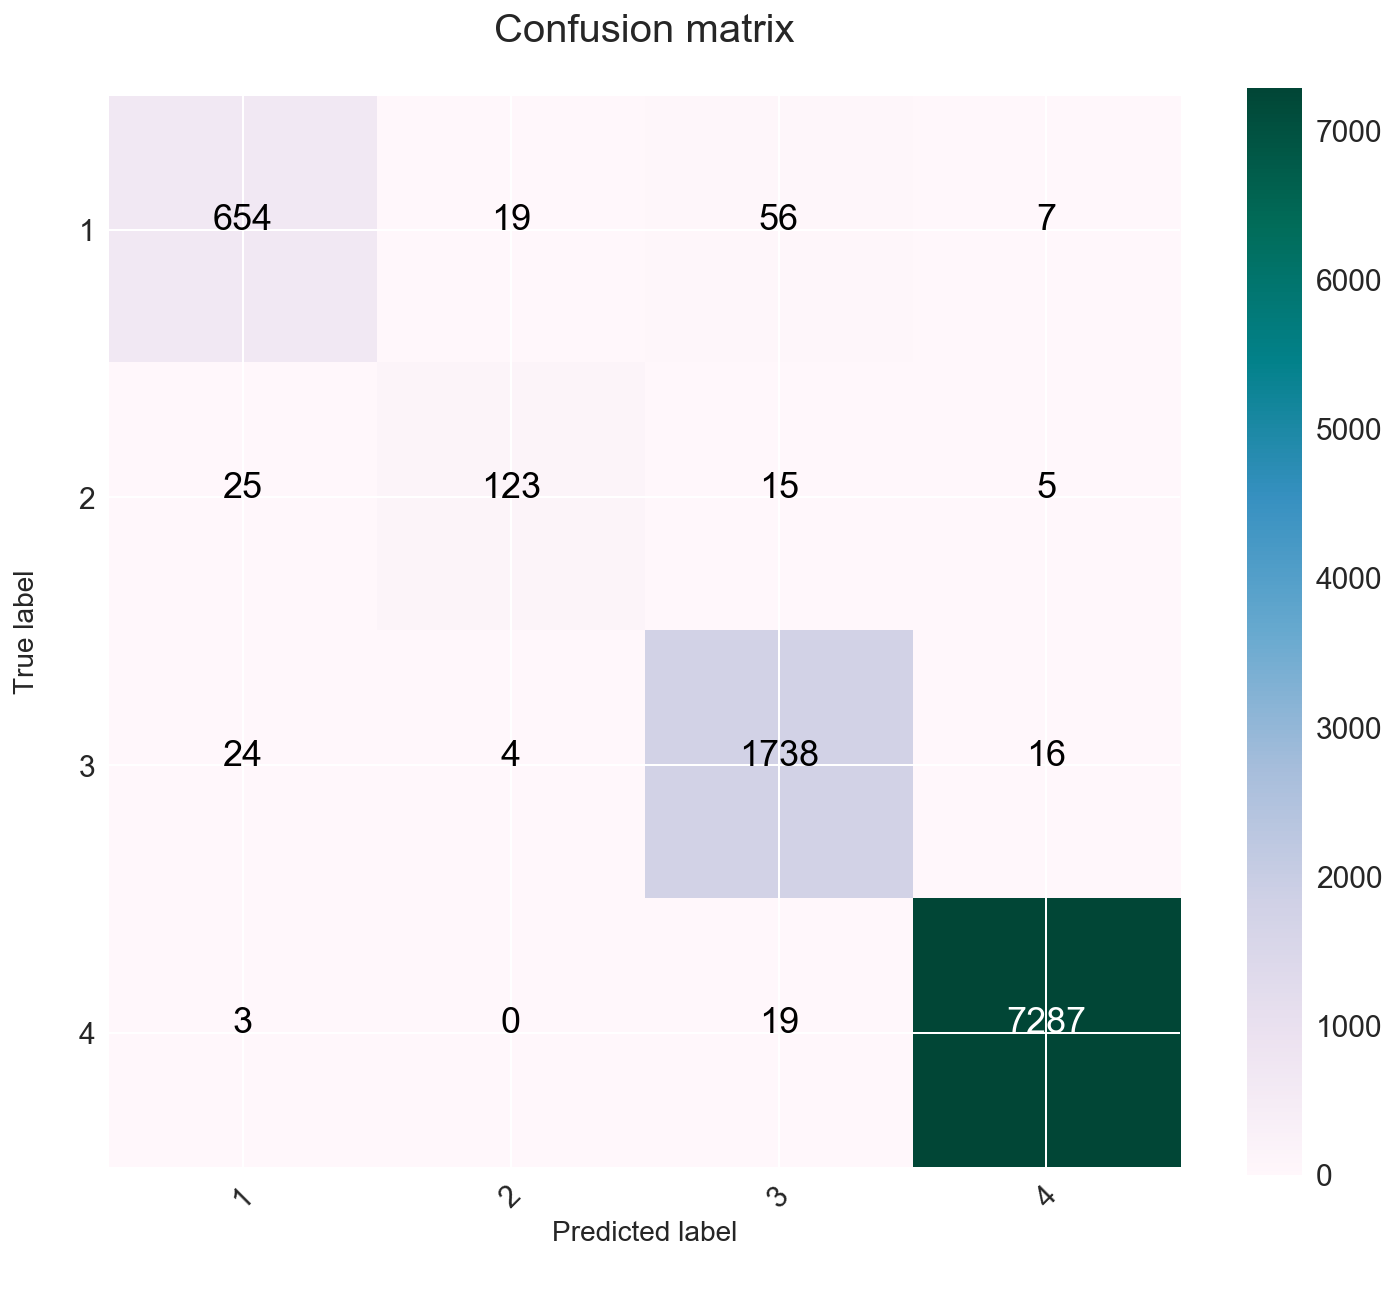

In [210]:
cmat = confusion_matrix(yte, y_pred)
plotter_help.plot_confusion_matrix(cmat, gbc_mod.classes_)

<br/>

The Gradient Boosting Classifier is performing significantly better that the other classifiers that I have used. However, the results indicate that my model might be overfitting. By using a learning rate of 0.08 and limiting the depth of the trees to 6, it should help to lower the variance and avoid overfitting of the model. 

<br/>

<a id='test_data'></a>
## 7. Importing, processing and scoring on test data

----

In [100]:
#importing test stance and body csv files 

test_stance = pd.read_csv('../../../fnc-1/competition_test_stances.csv', encoding='utf8')
test_body = pd.read_csv('../../../fnc-1/competition_test_bodies.csv', encoding='utf8')
test = pd.merge(test_stance, test_body, how='left', on='Body ID')


#pre_processing on test data
print "Cleaning and processing test text..."
processor = PreProcessor()
clean_test = processor.transform_text(test)
clean_test.drop('all_text', axis=1, inplace=True)
print "done."


#transforming test data into tf-idf matrix 
print "TF-IDF vectorisation..."
xHTestTfidf = vecH.transform(clean_test.headline)
print 'Test headline matrix shape: \t', xHTestTfidf.shape
    
xBTestTfidf = vecB.transform(clean_test.body)
print 'Test body matrix shape: \t', xBTestTfidf.shape

print "done."


#transforming the test data with the SVD fitted on the training data
print "Singular Value Decomposition..."
xHeadSvdTe300 = svd_300.transform(xHTestTfidf)
xBodySvdTe300 = svd_300.transform(xBTestTfidf)

print "done."


#finding top features in train 
print "Generating features..."
tr_tfidf_body = vecB2.transform(clean_test.body)

top_features_test = []
for i in range(tr_tfidf_body.shape[0]):
    top_features_test.append(top_feats_in_doc(tr_tfidf_body, features, i))

clean_test['top_features'] = top_features_test
    
#generating features 

gf = GenerateFeatures()
clean_test = gf.generate_features(clean_test, xHeadSvdTe300, xBodySvdTe300, xHTestTfidf, xBTestTfidf)
print "done."

#creating feature matrix 
print "Setting up feature matrix..."
headline_polarity = np.asarray(clean_test.headline_polarity).reshape(-1,1)
body_polarity = np.asarray(clean_test.body_polarity).reshape(-1,1)
bin_co_occ = np.asarray(clean_test.bin_co_occ).reshape(-1,1)
bin_co_occ_top_words = np.asarray(clean_test.bin_co_occ_top_words).reshape(-1,1)
body_subjectivity = np.asarray(clean_test.body_subjectivity).reshape(-1,1)
headline_subjectivity = np.asarray(clean_test.headline_subjectivity).reshape(-1,1)
tfidf_cosine_sim = np.asarray(clean_test.tfidf_cosine_sim).reshape(-1,1)
svd_cosine_sim = np.asarray(clean_test.svd_cosine_sim).reshape(-1,1)
refuting_word_head = np.asarray(clean_test.refuting_word_head).reshape(-1,1)
refuting_word_body = np.asarray(clean_test.refuting_word_body).reshape(-1,1)

X_test = np.hstack((xHeadSvdTe300, xBodySvdTe300, bin_co_occ, bin_co_occ_top_words, body_polarity,
                    body_subjectivity, headline_polarity, headline_subjectivity, 
                    tfidf_cosine_sim, svd_cosine_sim, refuting_word_head, refuting_word_body))
print "done."

Cleaning and processing test text...
done.
TF-IDF vectorisation...
Test headline matrix shape: 	(25413, 322089)
Test body matrix shape: 	(25413, 322089)
done.
Singular Value Decomposition...
done.
Generating features...
done.
Setting up feature matrix...
done.


### 7.2 Scoring the test data 

----

In [207]:
#gbc model 
true_y = clean_test.Stance
pred_test = gbc_mod.predict(X_test)

print_scores(true_y, pred_test)

Accuracy:			0.865462558533

F1 score:
1 				0.505201387037
2 				0.0
3 				0.711671802773
4 				0.964107123014

Weighted accuracy score: 	0.844819301485


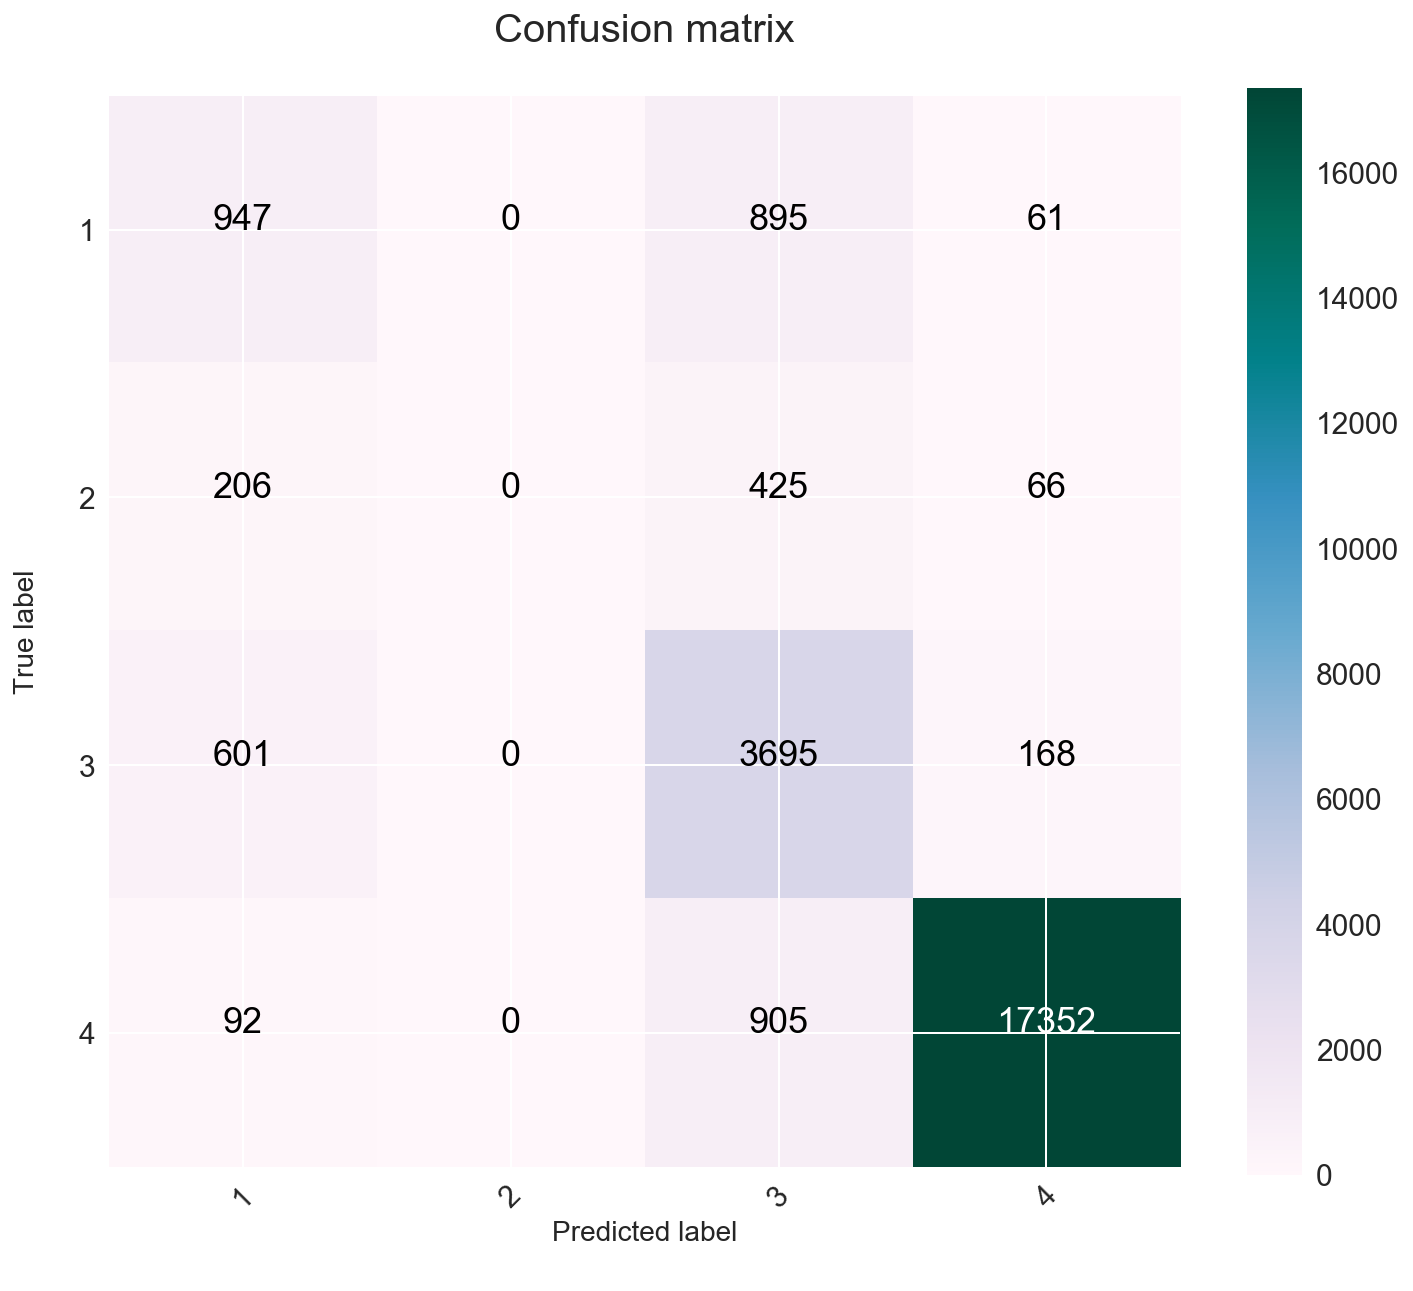

In [208]:
cmat = confusion_matrix(true_y, pred_test)
plotter_help.plot_confusion_matrix(cmat, gbc_mod.classes_)

<a id='conclusion'></a>
## 8. Conclusion 

-----

My model is very good at predicting majority class however looses accuracy when predicting the minority classes. To over come this problem I would like to try to re-train the model reducing the number of samples in the majority class to see if the model can become better at identifying the other classes. I would then hope to combine the models, comparing the prediction probabilities of both models and performing some sort of averaging step.  

Another challenge I have faced with the project is that there is a significant difference in the vocabulary of the test data to the training data. It would be interesting to import a word2vec model which has been trained on a large news dataset to help provide additional meaning and understanding of the test data.  

My final weighted accuracy score of **84%** on the test data is a **37%** improvement on the baseline for the model. This is a significant improvement and could provide a great tool for labelling two texts as related and unrelated. The model would need further improvements when predicting the minority classes, especially for the stance **agree** or **disagree** before it could have useful applications within the field of automated fact-checking. However, the suggested extensions to my project outlined above could help the model to learn these relationships better and make it viable.  

<br/>
<br/>